In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_data = pd.read_csv("IRIS.csv")

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

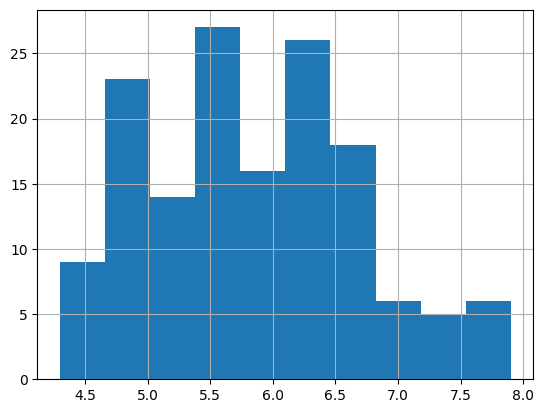

In [11]:
iris_data['sepal_length'].hist()

<Axes: >

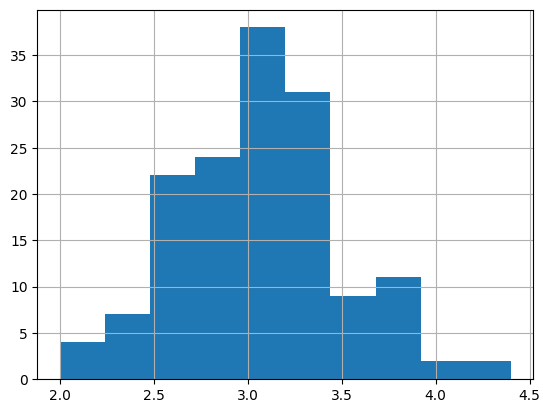

In [12]:
iris_data['sepal_width'].hist()

<Axes: >

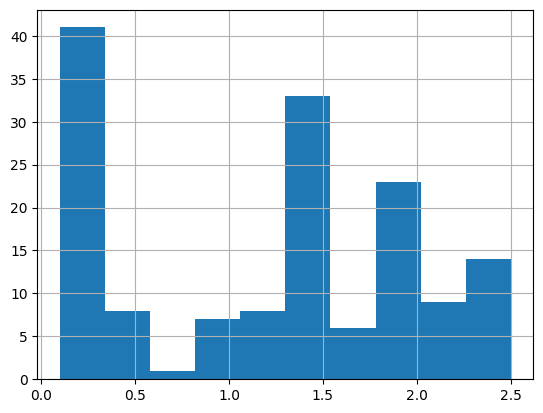

In [13]:
iris_data['petal_width'].hist()

<Axes: >

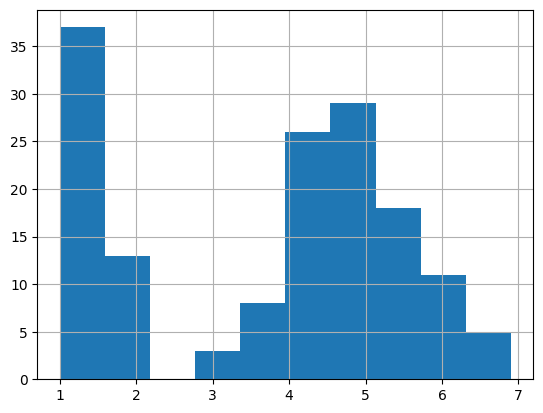

In [14]:
iris_data['petal_length'].hist()

In [17]:
colours = ['blue','orange','red']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

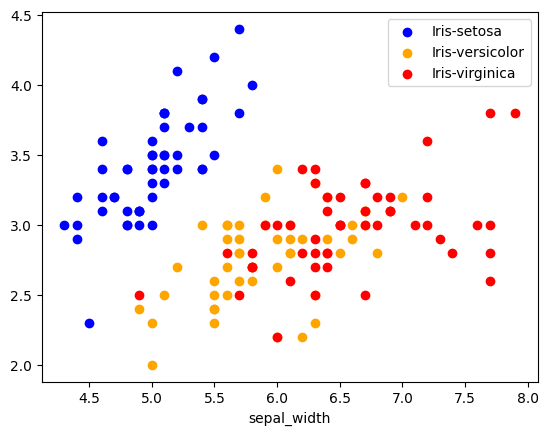

In [19]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c = colours[i], label = species[i])
plt.xlabel("sepal_length")
plt.xlabel("sepal_width")
plt.legend()

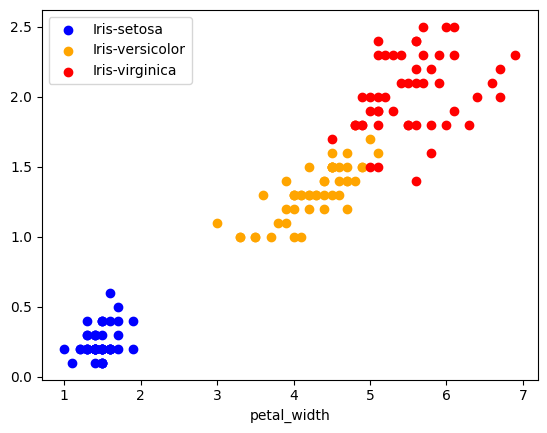

In [20]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c = colours[i], label = species[i])
plt.xlabel("petal_length")
plt.xlabel("petal_width")
plt.legend()

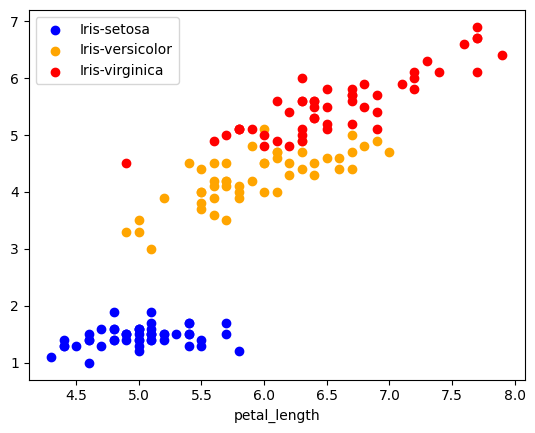

In [21]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c = colours[i], label = species[i])
plt.xlabel("sepal_length")
plt.xlabel("petal_length")
plt.legend()

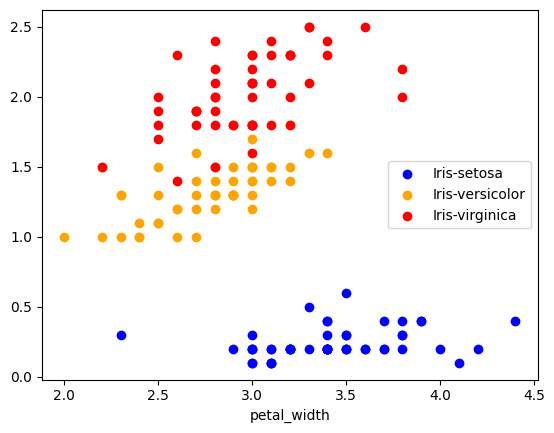

In [22]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'], c = colours[i], label = species[i])
plt.xlabel("sepal_width")
plt.xlabel("petal_width")
plt.legend()

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
iris_data['species'] = le.fit_transform(iris_data['species'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

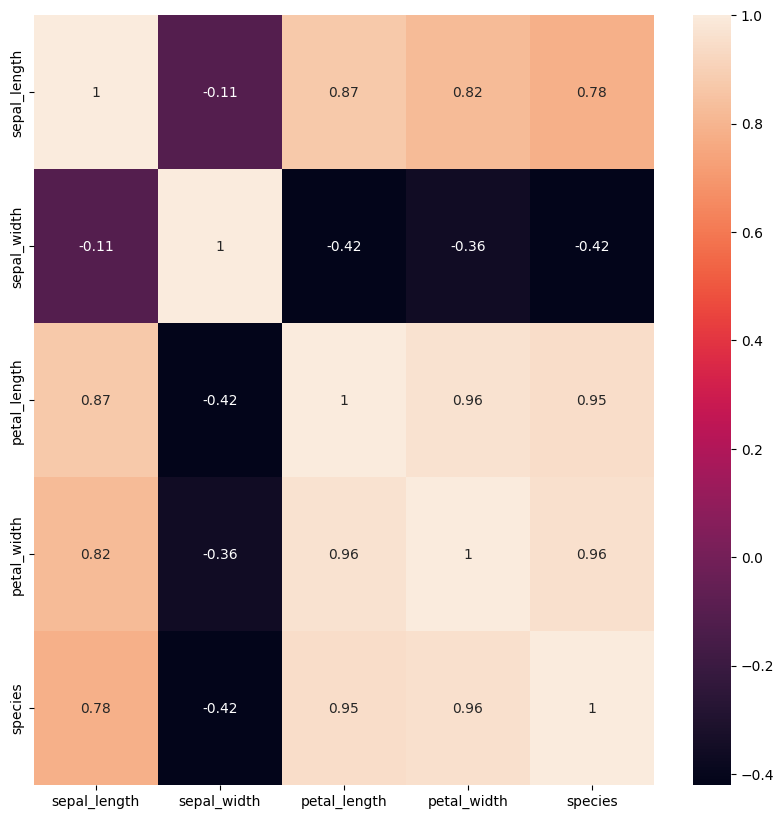

In [33]:
corr = iris_data.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot = True, ax=ax)

In [92]:
from sklearn.model_selection import train_test_split
X = iris_data.drop(columns = ['species'])
Y = iris_data['species']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20)

In [93]:
# LinearRegression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [94]:
model1.fit(x_train,y_train)

LinearRegression()

In [95]:
print("Accuracy for Linear Regression : ",model1.score(x_test,y_test))

Accuracy for Linear Regression :  0.9331673296249244


In [96]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [97]:
model2.fit(x_train,y_train)

LogisticRegression()

In [98]:
print("Accuracy for logistic Regression : ",model2.score(x_test,y_test)*100)

Accuracy for logistic Regression :  100.0


In [99]:
# Knn - K-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()

In [100]:
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [101]:
print("Accuracy for Knn : ",model3.score(x_test,y_test)*100)

Accuracy for Knn :  100.0


In [102]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()

In [103]:
model4.fit(x_train,y_train)

DecisionTreeClassifier()

In [104]:
print("Accuracy for Decision Tree Classifier : ",model4.score(x_test,y_test)*100)

Accuracy for Decision Tree Classifier :  96.66666666666667
